In [1]:
from collections import defaultdict

In [ ]:
from data.terra_ood_iid import l as lterra

In [ ]:
from data.home_ood_iid import l as lhome

In [17]:
from data.home_ood_iid_d6 import l as lhomed6

In [18]:
lhomed6.keys()

dict_keys(['home0_erm_lp_0926', 'home0_twama_d6_lpl4w0a_0926', 'home0_twama_d6_lpl4w0_0926', 'home1_erm_lp_0926', 'home1_twama_d6_lpl4w0a_0926', 'home1_twama_d6_lpl4w0_0926', 'home2_erm_lp_0926', 'home2_twama_d6_lpl4w0a_0926', 'home2_twama_d6_lpl4w0_0926', 'home3_erm_lp_0926', 'home3_twama_d6_lpl4w0a_0926', 'home3_twama_d6_lpl4w0_0926'])

In [3]:
from data.home_ood_iid_dn import l

In [19]:
l["home0_erm_lp_dn9_0926"] = lhomed6["home0_erm_lp_0926"]

In [ ]:
l = {**lterra, **lhome}

In [4]:
import matplotlib.cm as cm

In [5]:
MIN_STEP=-1
MAX_STEP=5001

In [21]:
import numpy as np
import scipy
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib import cm

def plot_slopes_c(l, label, with_stats=True):
    fig = plt.figure()
    l = [ll for ll in l if MIN_STEP< ll["step"] < MAX_STEP]
    iids = [ll["val_acc"] for ll in l]
    oods = [ll["test_acc"] for ll in l]
    colormap = cm.rainbow(np.linspace(0, 1, max(700, MAX_STEP-MIN_STEP)))
    color = [colormap[ll["step"]-MIN_STEP] for ll in l]
    plt.scatter(iids, oods, color=color)
    title = label
    if with_stats:
        outs = stats.linregress(iids, oods)
        names = ["slope", "intercept", "r_value", "p_value", "std_err"]
        dict_out = {key: "{:.4f}".format(value) for key, value in zip(names, outs)}
        title += " " + dict_out["r_value"]
    else:
        dict_out = {}
    plt.xlabel("IID", fontsize="x-large")
    plt.ylim([0.52, 0.71])
    plt.xlim([0.77, 0.87])
    plt.ylabel("OOD", fontsize="x-large")
    plt.title(title, fontsize="x-large")
    return dict_out


plt.rcParams["figure.figsize"] = (6, 4)

In [7]:
l.keys()

dict_keys(['home0_erm_lp_dn1.0_0926', 'home0_erm_lp_dn0.10_0926', 'home0_erm_lp_dn0.25_0926', 'home0_erm_lp_dn1.5_0926', 'home0_erm_lp_dn4.0_0926', 'home0_erm_lp_dn2.0_0926', 'home0_erm_lp_dn0_0926', 'home0_erm_lp_dn0.5_0926'])

['home0_erm_lp_dn0_0926',
 'home0_erm_lp_dn0.10_0926',
 'home0_erm_lp_dn0.25_0926',
 'home0_erm_lp_dn0.5_0926',
 'home0_erm_lp_dn1.0_0926',
 'home0_erm_lp_dn1.5_0926',
 'home0_erm_lp_dn2.0_0926',
 'home0_erm_lp_dn4.0_0926']

In [ ]:
dict_out = defaultdict(list)
for test_env in [1]:
    plt.show()
    print(test_env)
    for key in sorted(l.keys(), key=lambda x:x.split("_dn")[1].split("_")):
        if "lpl4w0a_i" in key or "lpl4w0_i" in key:
            if key.startswith("terra" + str(test_env)):
                plt.show()
                print(key)
                short_key = "_".join(key.split("_")[1:])
                dict_out[short_key].append(plot_slopes_c(l[key], label=key))

In [34]:
num_weightings = 11
half_num_weightings = (num_weightings - 1) // 2
weightings = [0.5 + 0.5 * (c-half_num_weightings) / max(1, half_num_weightings) for c in range(num_weightings)]

In [35]:
weightings

[0.0, 0.09999999999999998, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

0
home0_erm_lp_dn0_0926


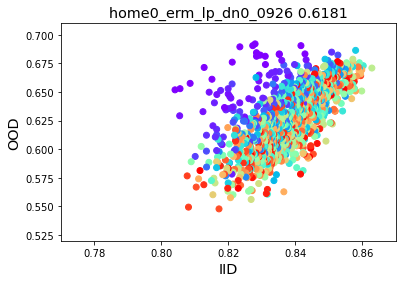

home0_erm_lp_dn0.10_0926


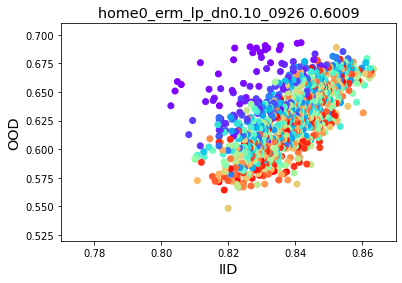

home0_erm_lp_dn0.25_0926


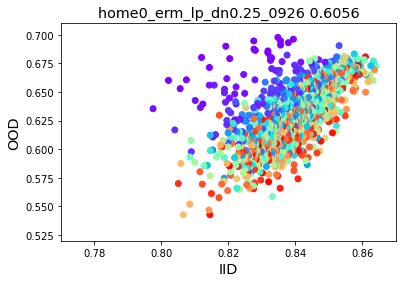

home0_erm_lp_dn0.5_0926


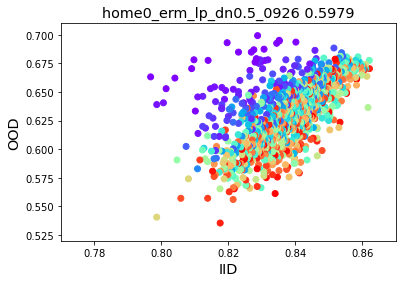

home0_erm_lp_dn1.0_0926


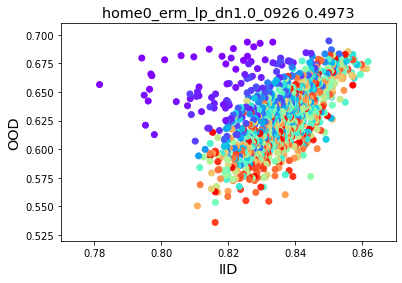

home0_erm_lp_dn1.5_0926


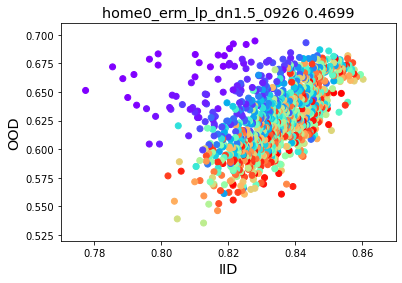

home0_erm_lp_dn2.0_0926


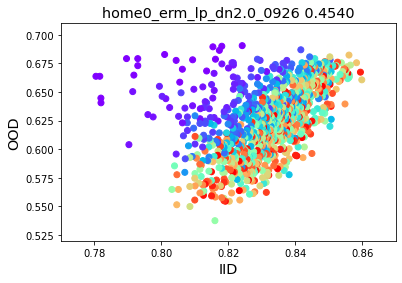

home0_erm_lp_dn4.0_0926


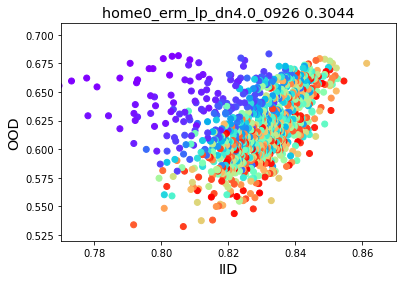

home0_erm_lp_dn9_0926


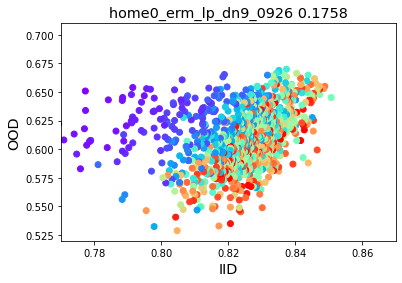

In [22]:
dict_out = defaultdict(list)
for test_env in [0]:
    plt.show()
    print(test_env)
    for key in sorted(l.keys(), key=lambda x:x.split("_dn")[1].split("_")):
        if key.startswith("home" + str(test_env)):
            plt.show()
            print(key)
            short_key = "_".join(key.split("_")[1:])
            dict_out[short_key].append(plot_slopes_c(l[key], label=key))

In [ ]:
[v["r_value"] for v in value]

In [ ]:
for key, value in dict_out.items():
    print(key)
    print([float(v["r_value"]) for v in value])
    print(np.mean([float(v["r_value"]) for v in value]))